In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import pandas as pd
import matplotlib.pyplot as plt




In [25]:
df = pd.read_csv("output\INS\clinvar_seqMUT_scores.csv")


In [16]:
df["ClinicalSignificance"].unique()
df.columns

Index(['data', 'ClinicalSignificance', 'PhenotypeIDS', 'PhenotypeList', 'Type',
       'HGNC_ID', 'WTpSeq', 'WTcSeq', 'Mutation', 'MUTpSeq', 'comparison',
       'chain1', 'chain2', 'chain1_length', 'chain2_length', 'aligned_length',
       'rmsd', 'identical/aligned'],
      dtype='object')

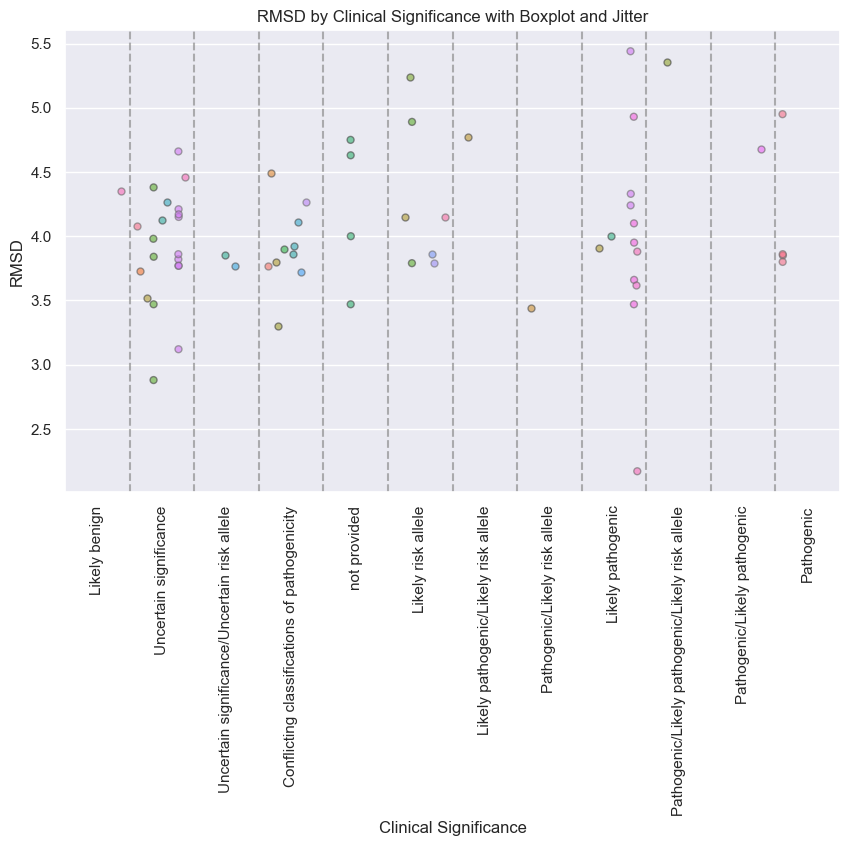

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct order for ClinicalSignificance
order = [
    'Likely benign',
    'Uncertain significance',
    'Uncertain significance/Uncertain risk allele',
    'Conflicting classifications of pathogenicity',
    'not provided',
    'Likely risk allele',
    'Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely risk allele',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely pathogenic',
    'Pathogenic',
]

# Convert ClinicalSignificance to a categorical type with the correct order
df['ClinicalSignificance'] = pd.Categorical(df['ClinicalSignificance'], categories=order, ordered=True)

# Create the figure and axis
plt.figure(figsize=(10, 6))


# Overlay the stripplot (scatter with jitter)
sns.stripplot(
    y="rmsd", 
    x="ClinicalSignificance", 
    data=df, 
    jitter=True,  # Add jitter for horizontal wiggle
    dodge=True,   # Spread overlapping points
    alpha=0.6,    # Make points slightly transparent for better visibility
    linewidth=1,  # Add border to points
    order=order,
    hue="PhenotypeList"

)

# Add vertical lines to separate categories
for i in range(1, len(order)):
    plt.axvline(i - 0.5, color='gray', linestyle='--', alpha=0.6)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Clinical Significance')
plt.ylabel('RMSD')
plt.title('RMSD by Clinical Significance with Boxplot and Jitter')
plt.legend()
plt.legend([],[], frameon=False)



In [27]:
import plotly.express as px
import pandas as pd


# Define the correct order for ClinicalSignificance
order = [
    'Likely benign',
    'Uncertain significance',
    'Uncertain significance/Uncertain risk allele',
    'Conflicting classifications of pathogenicity',
    'not provided',
    'Likely risk allele',
    'Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely risk allele',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele',
    'Pathogenic/Likely pathogenic',
    'Pathogenic',
]

# Create the interactive scatter plot
fig = px.strip(df, 
               x='ClinicalSignificance', 
               y='rmsd', 
               category_orders={'ClinicalSignificance': order},
               title="RMSD vs Clinical Significance",
               #jitter=True,  # Add horizontal jitter
               )

# Show the interactive plot
fig.show()

# To save as HTML
#fig.write_html("interactive_plot.html")


TypeError: strip() got an unexpected keyword argument 'hue'